In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import eigvals
import numpy as np

In [24]:
df = pd.read_csv(r"first inten project.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [ ]:
df.drop(columns=['Booking_ID'], inplace=True)
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


In [26]:
df.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [28]:
df.duplicated().sum()

np.int64(10747)

In [29]:
df.drop_duplicates(inplace=True)
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled
36276,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
36279,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled


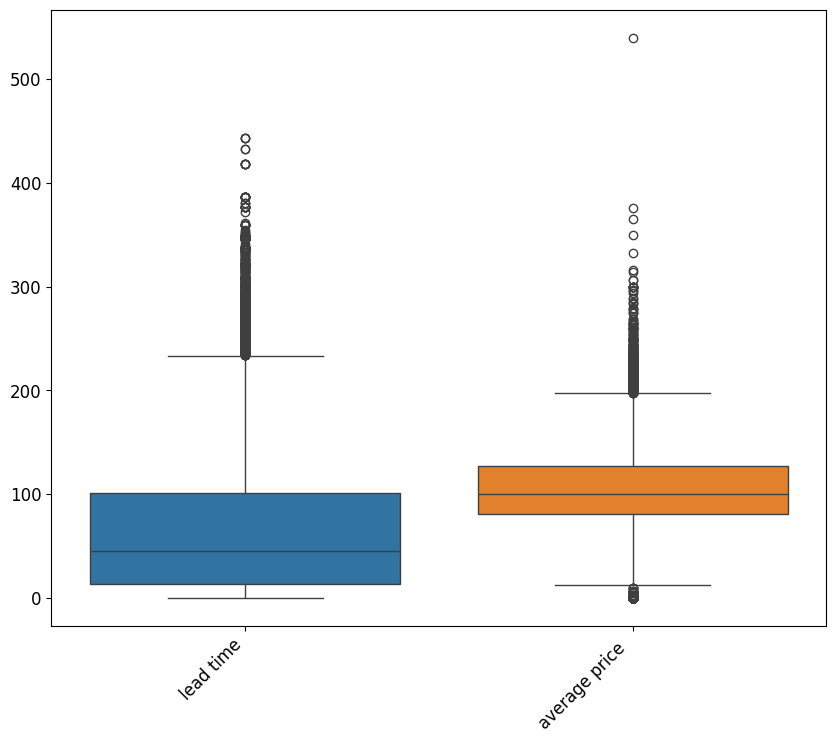

(1806, 2)

In [30]:
numerical_df = df[['lead time', 'average price ']]

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1


outliers = numerical_df[((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]


plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()
outliers.shape

In [31]:
df.drop(outliers.index, inplace=True)
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled
36276,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
36279,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled


In [32]:
cat_cols = df.select_dtypes(include=['object']).columns

df_cat = df[cat_cols].copy()

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23732 entries, 0 to 36283
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type of meal         23732 non-null  object
 1   room type            23732 non-null  object
 2   market segment type  23732 non-null  object
 3   booking status       23732 non-null  object
dtypes: object(4)
memory usage: 927.0+ KB


In [33]:
n_categories = df_cat.nunique()

cat_counts = pd.DataFrame({
    'column': n_categories.index,
    'n_categories': n_categories.values
}).reset_index(drop=True)

cat_counts

,column,n_categories
0,type of meal,3
1,room type,7
2,market segment type,5
3,booking status,2


In [34]:
dfEncoded = df.copy()

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    dfEncoded[col] = le.fit_transform(dfEncoded[col])
    encoders[col] = le  
dfEncoded

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1
1,1,0,1,3,2,0,0,5,4,0,0,0,106.68,1,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0
4,1,0,1,2,2,0,0,48,4,0,0,0,77.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,2,0,0,3,2,0,0,63,4,0,0,0,94.50,0,0
36276,2,0,2,3,2,0,0,5,4,0,0,0,106.68,1,1
36279,2,0,1,1,2,0,0,48,4,0,0,0,94.50,0,0
36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,1


In [35]:
columns_to_normalize = ['lead time', 'average price ']

scaler = MinMaxScaler()

dfEncoded[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(dfEncoded[columns_to_normalize].head())

   lead time  average price 
0   0.961373        0.410545
1   0.021459        0.511452
2   0.004292        0.205272
3   0.905579        0.475367
4   0.206009        0.351124


In [36]:
dfEncoded['booking status'].value_counts()

booking status
1    17128
0     6604
Name: count, dtype: int64

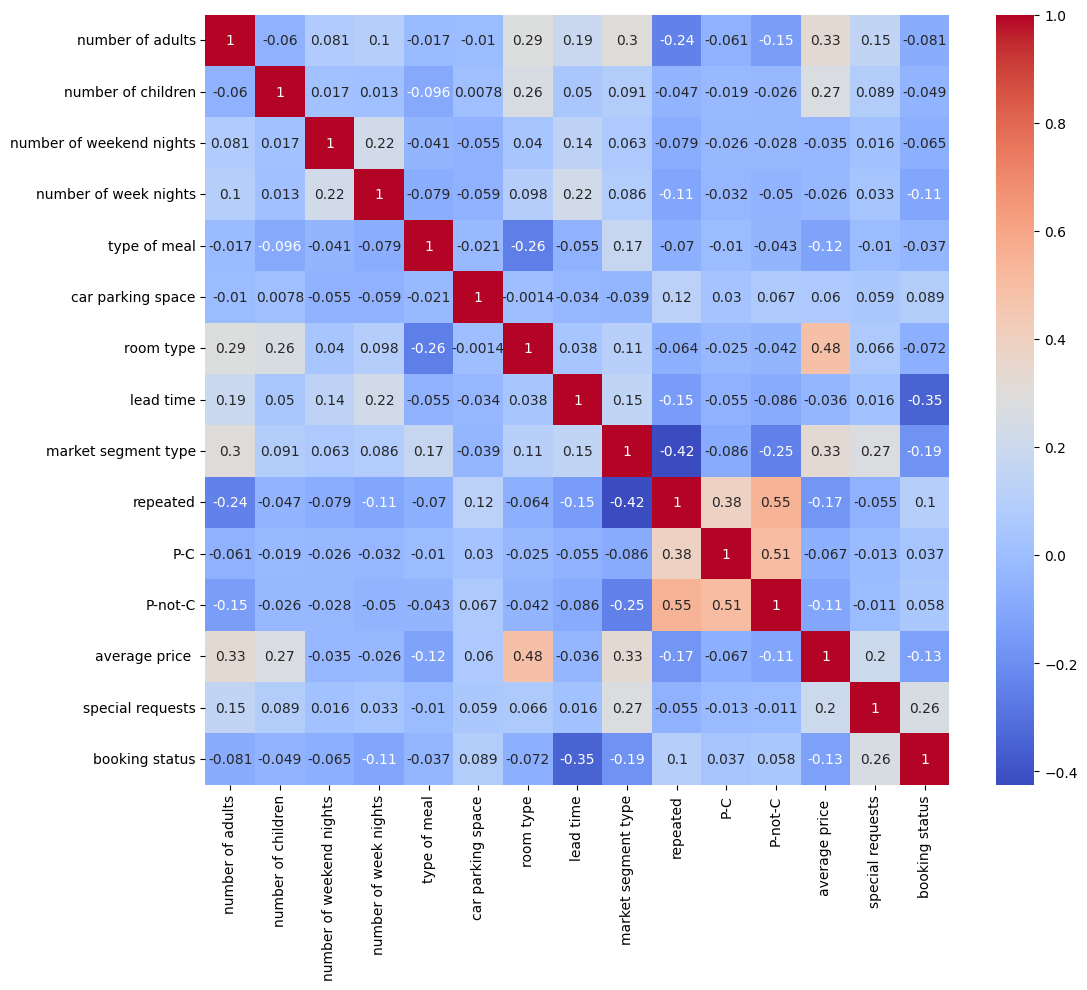

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dfEncoded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [38]:
X = df.select_dtypes(include=[float, int]).copy()


# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)

                     feature        VIF
0           number of adults  13.553191
1             average price   11.987746
2      number of week nights   3.427771
3                  lead time   2.360983
4   number of weekend nights   2.129451
5           special requests   1.958895
6                    P-not-C   1.693682
7                   repeated   1.510980
8                        P-C   1.386295
9         number of children   1.209742
10         car parking space   1.073583


In [39]:
# Eigenvalues of correlation matrix
eigenvalues = eigvals(corr)

# Condition index = sqrt(largest eigenvalue / each eigenvalue)
condition_index = np.sqrt(max(eigenvalues) / eigenvalues)
print("Condition Index values:", condition_index)


Condition Index values: [1.         1.23227885 1.32480708 1.46149651 1.51363513 1.64455988
 1.66266481 1.78064222 1.89266642 2.02234104 2.10023523 2.34703235
 2.66148955 2.59432032 2.52320071]


In [40]:
x = dfEncoded.drop('booking status', axis=1)
y = dfEncoded['booking status']

In [42]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
paramGridLR = [
    {
        'penalty': ['l2'],
        'C': [0.1, 1, 2.5, 5, 10],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'C': [0.1, 1, 2.5, 5, 10],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 250, 500],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.1, 1, 2.5, 5, 10],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [100, 250, 500],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': [None],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500],
        'class_weight': [None, 'balanced']
    }
]

In [44]:
modelLR = LogisticRegression()

In [45]:
grid = GridSearchCV(estimator=modelLR, param_grid=paramGridLR, scoring='f1', cv=10, n_jobs=-1, verbose=1)

In [46]:
grid.fit(xTrain, yTrain)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 2.5, 5, 10],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 250, 500], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'saga']},
                         {'C': [0.1, 1, 2.5, 5, 10],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 250, 500], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.1, 1, 2.5, 5, 10],
                          'class_weight': [None, 'balanced'],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [100, 250, 500],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'class_weight': [None, 'balanced'],
                          'max_iter': [100, 250, 500], 'penalty': [None],
                          'solver': ['lbfgs', 'newton-cg', 'saga']}],
             scoring='f1', verbose=1)

In [47]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best CV Accuracy: 0.8719388830026613


In [48]:
best_dt = grid.best_estimator_
yPredLR = best_dt.predict(xTest)

In [49]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(yTest, yPredLR))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPredLR))
print(classification_report(yTest, yPredLR))

=== Logistic Regression ===
Accuracy: 0.7915051407382437
Confusion Matrix:
 [[ 779  900]
 [ 337 3917]]
              precision    recall  f1-score   support

           0       0.70      0.46      0.56      1679
           1       0.81      0.92      0.86      4254

    accuracy                           0.79      5933
   macro avg       0.76      0.69      0.71      5933
weighted avg       0.78      0.79      0.78      5933



In [50]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

In [51]:
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=100, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(xTrain, yTrain)

Fitting 100 folds for each of 180 candidates, totalling 18000 fits


GridSearchCV(cv=100, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [52]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.8374071605408493


In [53]:
best_dt = grid.best_estimator_
yPred = best_dt.predict(xTest)

print("\n=== Decision Tree Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Decision Tree Performance on Test Set ===
Test Accuracy: 0.8282487780212372
Confusion Matrix:
 [[1014  665]
 [ 354 3900]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.67      1679
           1       0.85      0.92      0.88      4254

    accuracy                           0.83      5933
   macro avg       0.80      0.76      0.78      5933
weighted avg       0.82      0.83      0.82      5933



In [54]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],            
    'max_depth': [5, 10, 15, None],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

In [55]:
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [56]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Best Parameters: {'class_weight': None, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8438676569970506


In [57]:
best_rf = grid.best_estimator_
yPred = best_rf.predict(xTest)

print("\n=== Random Forest Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Random Forest Performance on Test Set ===
Test Accuracy: 0.8407213888420698
Confusion Matrix:
 [[ 988  691]
 [ 254 4000]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1679
           1       0.85      0.94      0.89      4254

    accuracy                           0.84      5933
   macro avg       0.82      0.76      0.79      5933
weighted avg       0.84      0.84      0.83      5933



In [58]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15, None],   
    'min_child_weight': [1, 3, 5],   
    'gamma': [0, 0.1, 0.3],          
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'scale_pos_weight': [1, 2, 5],    
}

In [59]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [60]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'scale_pos_weight': 1}
Best Cross-Validation Accuracy: 0.8450477820117379


c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [61]:
best_rf = grid.best_estimator_
yPred = best_rf.predict(xTest)

print("=== XGBoost ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

=== XGBoost ===
Test Accuracy: 0.8440923647395921
Confusion Matrix:
 [[1041  638]
 [ 287 3967]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1679
           1       0.86      0.93      0.90      4254

    accuracy                           0.84      5933
   macro avg       0.82      0.78      0.79      5933
weighted avg       0.84      0.84      0.84      5933



In [62]:
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient (only for rbf, poly, sigmoid)
    'degree': [2, 3, 4],             # Degree for 'poly' kernel
    'class_weight': [None, 'balanced']  # Handle imbalance
}

svm = SVC(random_state=42)

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [63]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'C': 100, 'class_weight': None, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.8210572787388445


In [64]:
best_rf = grid.best_estimator_
yPred = best_rf.predict(xTest)

print("=== SVM ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

=== SVM ===
Test Accuracy: 0.8181358503286702
Confusion Matrix:
 [[ 915  764]
 [ 315 3939]]
              precision    recall  f1-score   support

           0       0.74      0.54      0.63      1679
           1       0.84      0.93      0.88      4254

    accuracy                           0.82      5933
   macro avg       0.79      0.74      0.75      5933
weighted avg       0.81      0.82      0.81      5933

